# Finance Data Visualization Project

In this data project we will focus on exploratory data analysis of stock prices.

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

reading data from Google finance using pandas!


*Note: [we need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows  to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**)

### The Imports



In [4]:
!pip install pandas-datareader

In [3]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2011 to Jan 1st 2021 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use yahoo finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'yahoo', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK.

In [5]:
start = datetime.datetime(2011, 1, 1)
end = datetime.datetime(2021, 1, 1)

In [7]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [13]:
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,14.23,13.80,13.85,14.19,354322300.0,12.091187
2011-01-04,14.25,14.02,14.23,14.24,218978200.0,12.133790
2011-01-05,14.60,14.15,14.19,14.50,246151200.0,12.355334
2011-01-06,14.69,14.34,14.54,14.44,241658500.0,12.304208
2011-01-07,14.68,13.98,14.54,14.25,392328700.0,12.142312


In [4]:
# Could also do this for a Panel Object
#df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'google', start, end)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [8]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [ ]:
bank_stocks= pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

In [10]:
bank_stocks.head()

BAC                                                       C  \
             High    Low   Open  Close       Volume  Adj Close       High   
Date                                                                        
2011-01-03  14.23  13.80  13.85  14.19  354322300.0  12.091187  49.000000   
2011-01-04  14.25  14.02  14.23  14.24  218978200.0  12.133790  49.400002   
2011-01-05  14.60  14.15  14.19  14.50  246151200.0  12.355334  50.000000   
2011-01-06  14.69  14.34  14.54  14.44  241658500.0  12.304208  50.500000   
2011-01-07  14.68  13.98  14.54  14.25  392328700.0  12.142312  50.000000   

                                             ...         MS             \
                  Low       Open      Close  ...       Open      Close   
Date                                         ...                         
2011-01-03  47.799999  47.799999  49.000000  ...  27.629999  28.230000   
2011-01-04  48.299999  49.099998  49.000000  ...  28.459999  28.469999   
2011-01-05  48.799999  48.799999  49.700001  ...  28.360001  28.830000   
2011-01-06  49.299999  50.000000  49.500000  ...  28.850000  28.799999   
2011-01-07  48.400002  49.599998  49.400002  ...  28.840000  28.200001   

                                         WFC                                   \
                Volume  Adj Close       High        Low       Open      Close   
Date                                                                            
2011-01-03  21176700.0  22.478975  31.660000  31.160000  31.299999  31.580000   
2011-01-04  12859900.0  22.670088  31.940001  31.490000  31.650000  31.650000   
2011-01-05  15101100.0  22.956747  32.500000  31.400000  31.410000  32.369999   
2011-01-06  13200900.0  22.932856  32.470001  32.119999  32.150002  32.150002   
2011-01-07  17512600.0  22.455088  32.230000  30.639999  32.230000  31.500000   

                                   
                Volume  Adj Close  
Date                               
2011-01-03  34397100.0  22.997034  
2011-01-04  30341100.0  23.048010  
2011-01-05  43245600.0  23.572329  
2011-01-06  32500000.0  23.412113  
2011-01-07  81572300.0  22.938772  

[5 rows x 36 columns]

** Set the column name levels **

In [14]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [15]:
bank_stocks.head()

Bank Ticker    BAC                                                       C  \
Stock Info    High    Low   Open  Close       Volume  Adj Close       High   
Date                                                                         
2011-01-03   14.23  13.80  13.85  14.19  354322300.0  12.091187  49.000000   
2011-01-04   14.25  14.02  14.23  14.24  218978200.0  12.133790  49.400002   
2011-01-05   14.60  14.15  14.19  14.50  246151200.0  12.355334  50.000000   
2011-01-06   14.69  14.34  14.54  14.44  241658500.0  12.304208  50.500000   
2011-01-07   14.68  13.98  14.54  14.25  392328700.0  12.142312  50.000000   

Bank Ticker                                   ...         MS             \
Stock Info         Low       Open      Close  ...       Open      Close   
Date                                          ...                         
2011-01-03   47.799999  47.799999  49.000000  ...  27.629999  28.230000   
2011-01-04   48.299999  49.099998  49.000000  ...  28.459999  28.469999   
2011-01-05   48.799999  48.799999  49.700001  ...  28.360001  28.830000   
2011-01-06   49.299999  50.000000  49.500000  ...  28.850000  28.799999   
2011-01-07   48.400002  49.599998  49.400002  ...  28.840000  28.200001   

Bank Ticker                               WFC                        \
Stock Info       Volume  Adj Close       High        Low       Open   
Date                                                                  
2011-01-03   21176700.0  22.478975  31.660000  31.160000  31.299999   
2011-01-04   12859900.0  22.670088  31.940001  31.490000  31.650000   
2011-01-05   15101100.0  22.956747  32.500000  31.400000  31.410000   
2011-01-06   13200900.0  22.932856  32.470001  32.119999  32.150002   
2011-01-07   17512600.0  22.455088  32.230000  30.639999  32.230000   

Bank Ticker                                    
Stock Info       Close      Volume  Adj Close  
Date                                           
2011-01-03   31.580000  34397100.0  22.997034  
2011-01-04   31.650000  30341100.0  23.048010  
2011-01-05   32.369999  43245600.0  23.572329  
2011-01-06   32.150002  32500000.0  23.412113  
2011-01-07   31.500000  81572300.0  22.938772  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, it is encouraged to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).

** What is the max Close price for each bank's stock throughout the time period?**

In [21]:
bank_stocks['BAC']['Close'].max()

35.63999938964844

In [23]:
for tick in tickers:
    print(tick, bank_stocks[tick]['Close'].max())

BAC 35.63999938964844
C 81.91000366210938
GS 273.3800048828125
JPM 141.08999633789062
MS 68.52999877929688
WFC 65.93000030517578


In [24]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     35.639999
C       81.910004
GS     273.380005
JPM    141.089996
MS      68.529999
WFC     65.930000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [25]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [26]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2011-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04,0.003524,0.000000,0.000173,0.013309,0.008502,0.002217
2011-01-05,0.018258,0.014286,0.005315,0.012228,0.012645,0.022749
2011-01-06,-0.004138,-0.004024,-0.010287,-0.004922,-0.001041,-0.006796
2011-01-07,-0.013158,-0.002020,-0.008826,-0.018885,-0.020833,-0.020218


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

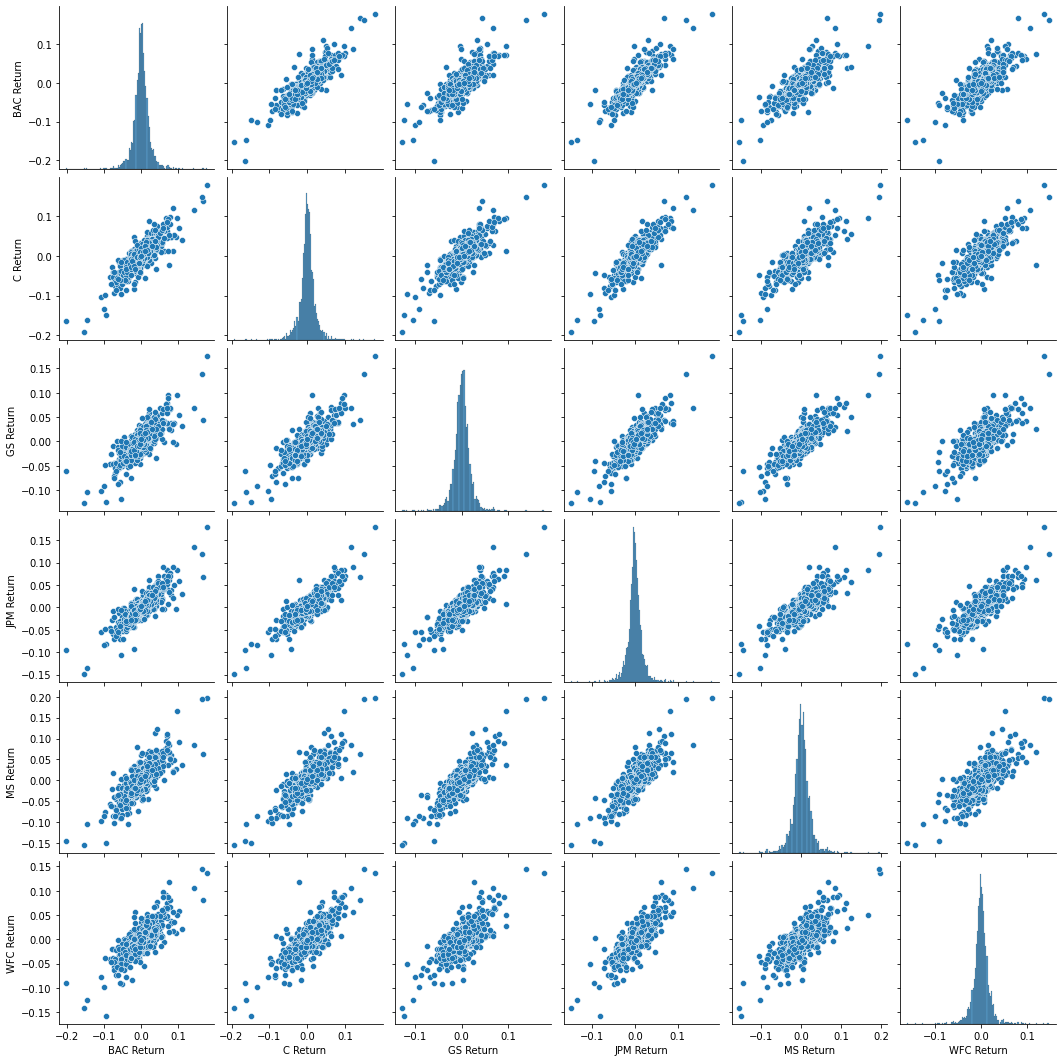

In [27]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [29]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2011-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04,0.003524,0.000000,0.000173,0.013309,0.008502,0.002217
2011-01-05,0.018258,0.014286,0.005315,0.012228,0.012645,0.022749
2011-01-06,-0.004138,-0.004024,-0.010287,-0.004922,-0.001041,-0.006796
2011-01-07,-0.013158,-0.002020,-0.008826,-0.018885,-0.020833,-0.020218


In [28]:
# Worst Drop (4 of them on same day)
returns.idxmin()

BAC Return   2011-08-08
C Return     2020-03-16
GS Return    2020-03-16
JPM Return   2020-03-16
MS Return    2020-03-16
WFC Return   2020-03-12
dtype: datetime64[ns]

In [31]:
# Best Single Day Gain
returns.idxmax()

BAC Return   2020-03-13
C Return     2020-03-13
GS Return    2020-03-13
JPM Return   2020-03-13
MS Return    2020-03-13
WFC Return   2020-03-24
dtype: datetime64[ns]

** You should have noticed that 5 banks have their biggest gain on the same day 3 days before the worst drop, did anythign significant happen in that time frame? **

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2020?**

In [32]:
returns.std() # we dont see much of deviation for any bank similar risk profiles
              #however BAC CITI AND MS have comparatively riskier than remaining 2.

BAC Return    0.022383
C Return      0.022456
GS Return     0.018459
JPM Return    0.018146
MS Return     0.022770
WFC Return    0.018275
dtype: float64

In [36]:
returns.loc['2020-01-01':'2020-12-31'].std() # we notice citigroup is more riskier in 2020.

BAC Return    0.036933
C Return      0.042502
GS Return     0.032929
JPM Return    0.034272
MS Return     0.036164
WFC Return    0.038573
dtype: float64

In [39]:
returns.loc['2019-01-01':'2019-12-31'].std() # we see very similar profile.

BAC Return    0.014566
C Return      0.015354
GS Return     0.014890
JPM Return    0.011869
MS Return     0.014701
WFC Return    0.012450
dtype: float64

** Create a distplot using seaborn of the 2020 returns for citigroup **

C:\Users\MSI\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C Return', ylabel='Density'>

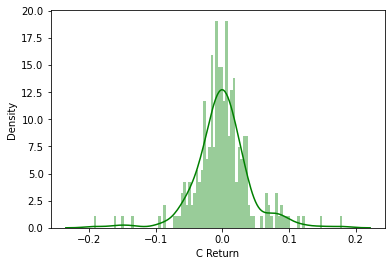

In [37]:
sns.distplot(returns.loc['2020-01-01':'2020-12-31']['C Return'],color='green',bins=100)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

C:\Users\MSI\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C Return', ylabel='Density'>

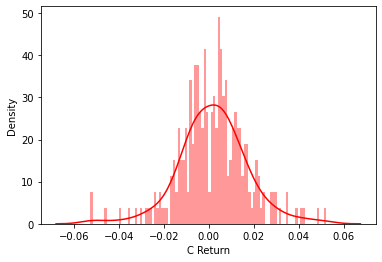

In [38]:
sns.distplot(returns.loc['2019-01-01':'2019-12-31']['C Return'],color='red',bins=100)

____
# More Visualization

using following seaborn, matplotlib, plotly and cufflinks, pandas.

### Imports

In [43]:
#!pip install cufflinks

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

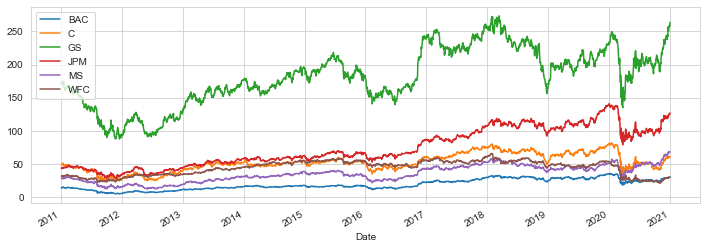

In [44]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

<AxesSubplot:xlabel='Date'>

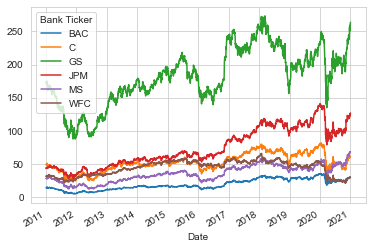

In [45]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [46]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2020. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2020**

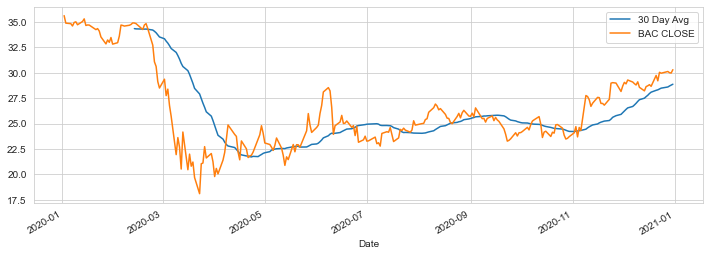

In [65]:
plt.figure(figsize=(12,4))
BAC['Close'].loc['2020-01-01':'2021-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2020-01-01':'2021-01-01'].plot(label='BAC CLOSE')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

In [57]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.916222,0.896926,0.984464,0.943399,0.488430
C,0.916222,1.000000,0.920828,0.868896,0.874158,0.699905
GS,0.896926,0.920828,1.000000,0.853229,0.952159,0.649436
JPM,0.984464,0.868896,0.853229,1.000000,0.923040,0.423807
MS,0.943399,0.874158,0.952159,0.923040,1.000000,0.478354
WFC,0.488430,0.699905,0.649436,0.423807,0.478354,1.000000


<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

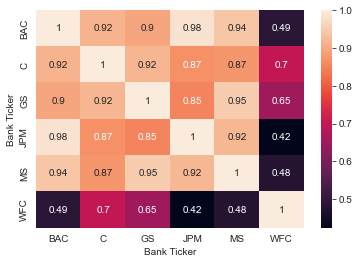

In [49]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

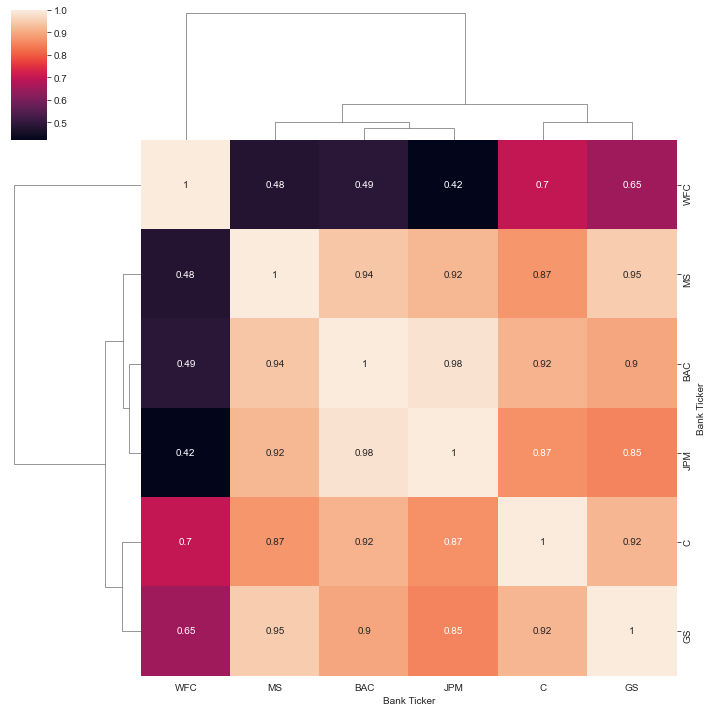

In [50]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [58]:
close_corr

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.916222,0.896926,0.984464,0.943399,0.488430
C,0.916222,1.000000,0.920828,0.868896,0.874158,0.699905
GS,0.896926,0.920828,1.000000,0.853229,0.952159,0.649436
JPM,0.984464,0.868896,0.853229,1.000000,0.923040,0.423807
MS,0.943399,0.874158,0.952159,0.923040,1.000000,0.478354
WFC,0.488430,0.699905,0.649436,0.423807,0.478354,1.000000


In [51]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [52]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2020-01-01':'2021-01-01'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2020.**

In [54]:
MS['Close'].loc['2020-01-01':'2021-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2020.**

In [56]:
BAC['Close'].loc['2020-01-01':'2021-01-01'].ta_plot(study='boll')